# <font color='black'>Introduction to Machine Learning</font>




The objective of this  session is to introduce and code the k-means clustering algorithm.


## <font color='black'>Set-Up</font>

---

First we will import the packages that we will need throughout the notebook.

In [1]:
import os
import numpy as np
import re

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt  

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

from scipy import optimize
from scipy.io import loadmat
import utils

%load_ext autoreload 
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# <font color='black'>K-means Clustering </font>

---
Today you will implement the K-means clustering algorithm. Firstly, we will implement the algorithm for a 2D dataset.


### Implementation

K-means is an algorithm to automatically cluster data examples that are similar together. Notably, for a given training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), the goal is to define the clusters. The algorithm initializes randomly the centroids, and then it asigns the examples to the cluster corresponding to the closest centroids and then recomputes the centroids. 


The K-means algorithm is as follows:

```python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)
    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

Note that the final solution depends on the initial setting of the centroids. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

#### Determine the closest centroids

Complete the code in the function `findClosestCentroids`. This function takes the data matrix `X` and the locations of all centroids inside `centroids` and outputs a vector `idx` that holds the index of the closest centroid to every training example.

In this case, you can implement this using a loop over every training example and every centroid.

In [2]:
def findClosestCentroids(X, centroids):
    # Set the number of clusters
    K = centroids.shape[0]

    # The centroids are in the following variable
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================
    
    for i in range(X.shape[0]):
        dist = np.sum( (X[i] - centroids) ** 2, axis=1 )
        idx[i] = np.argmin(dist)
            
    
        
    #plt.close()
    #plt.plot(list(range(2, centroids)), idx)
    #plt.xlabel("# of clusters (K)")
    #plt.ylabel("Cost")
    
    # =============================================================
    return idx

Once you have completed the code in `findClosestCentroids`, the following cell will run your code and you should see the output `[0 2 1]` corresponding to the centroid assignments for the first 3 examples.

In [3]:
data = loadmat(os.path.join('data', 'ex7data2.mat'))
X = data['X']

K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


### Computing centroid means

Once the algorithm has performed assignments of every point to a centroid, the second part updates, for each centroid, the mean of the points that were assigned to it. 

Complete then the function `computeCentroids`. You can implement this function using a loop over the centroids.

In [4]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    # The centroids are in the following variable
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================
    for k in range(K):
        Ck = [i for i in range(idx.size) if idx[i] == k]
        centroids[k,:] = np.mean( X[Ck,:], axis = 0 )
    
    # =============================================================
    return centroids

Check your implementation by running the following cell

In [5]:
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### K-means example  

See in the following animation how the k-means algorithm proceeds.

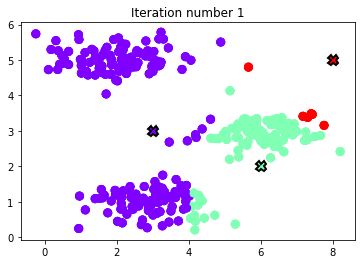

In [6]:
# Load an example dataset
data = loadmat(os.path.join('data', 'ex7data2.mat'))

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])


# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

### Random initialization 

A good strategy for initializing the centroids is to select random examples from the training set. Therefore, we can write,


```python
# Initialize the centroids to be random examples

# Randomly reorder the indices of examples
randidx = np.random.permutation(X.shape[0])
# Take the first K examples as centroids
centroids = X[randidx[:K], :]
```

The code above first *randomly* permutes the indices of the examples. Then, it selects the first $K$ examples based on the random permutation of the indices.

In [7]:
def kMeansInitCentroids(X, K):

    m, n = X.shape
    
    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================

    np.random.seed(99999)
    randidx = np.random.permutation( range(X.shape[0]) )
    
    # =============================================================
    return centroids

### Image compression with K-means

You will now apply K-means to image compression. 


In a 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (taking values from 0 to 255) that specify the red, green and blue values. 
Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. You will process every pixel in the image as an example and use the K-means algorithm to find the 16 colors that correspond to the clusters' centroids in the 3-dimensional RGB space. Afterwards, you will use the 16 colors to replace the pixels in the original image.

The code in the following cell first loads the image, and then reshapes it to create an m x 3 matrix of pixel colors, and calls your K-means function on it.

After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the `findClosestCentroids` function. This allows you to represent the original image using the centroid assignments of each pixel. 

The figure below shows the reconstruction of the compressed image obtained. 

c:\Python37_64\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Python37_64\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


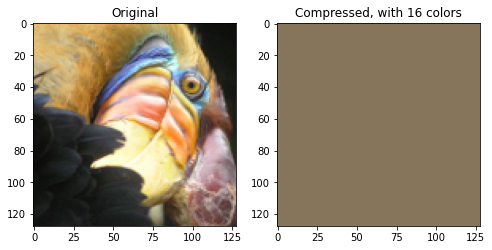

In [8]:
# ======= Experiment with these parameters ================
# You should try different values for those parameters
K = 16
max_iters = 10

# Load an image of a bird
# Change the file name and path to experiment with your own images
A = mpl.image.imread(os.path.join('data', 'bird_small.png'))
# ==========================================================

# Divide by 255 so that all values are in the range 0 - 1
A /= 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(-1, 3)

# When using K-Means, it is important to randomly initialize centroids
# You should complete the code in kMeansInitCentroids above before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = utils.runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids,
                                 max_iters)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

# Display the original image, rescale back by 255
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

## <font color='black'>Principal Component Analysis</font>

In this exercise, you will use principal component analysis (PCA) to perform dimensionalty reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset. 

### Example dataset
To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D.

<function matplotlib.pyplot.show(*args, **kw)>

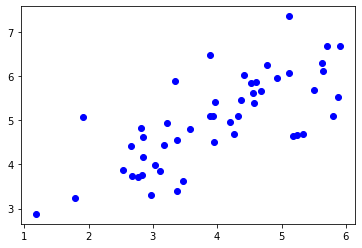

In [9]:
# The following command loads the dataset. You should now have the variable X in your environment
data = loadmat(os.path.join('data', 'ex7data1.mat'))
X = data['X']

# Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1], c='b');
plt.show

### Implementing PCA
In this part of the exercise, you will implement PCA. PCA consists of two computational steps: First, you compute the covariance matrix of the data. Then, you use the SVD function to compute the eigenvectors. These will correspond to the principal components of variation in the data.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. 

In [10]:
def featureNormalize(X):

    m, n = X.shape
    
    # ====================== YOUR CODE HERE ======================

    mu = np.mean(X, axis = 0)
    X_norm = X - mu
    std  = np.std(X_norm, axis = 0)
    X_norm = X_norm / std
   
    
    # =============================================================
    return X_norm, mu

In [11]:
# Before running PCA, it is important to first normalize X
X_norm, mu = featureNormalize(X);
print('X_norm[0:3]:')
print(X_norm[0:3])
print('\n Xnorm should be')
print('   [-0.5180535  -1.57678415]')
print('   [ 0.45915361  0.83189934]')
print('   [-1.13685138 -0.57729787]')

X_norm[0:3]:
[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]]

 Xnorm should be
   [-0.5180535  -1.57678415]
   [ 0.45915361  0.83189934]
   [-1.13685138 -0.57729787]


After normalizing the data, you can run PCA to compute the principal components. First, you should compute the covariance matrix of the data, which is given by:
$$
\Sigma = \cfrac{1}{m}X^TX
$$
where $ X $ is the data matrix with examples in rows, and $ m $ is the number of examples. Note that $ \Sigma$ is a  matrix and not the summation operator. After computing the covariance matrix, you can run SVD on it to compute the principal components. 

In [12]:
def pca(X):

    #PCA Run principal component analysis on the dataset X
    #U, S = pca(X) computes eigenvectors of the covariance matrix of X
    #Returns the eigenvectors U, the eigenvalues (on diagonal) in S

    # Useful values
    m, n = X.shape
    # You should return this values correctly
    U = np.zeros((n, n))
    S = np.zeros((n, n))


    # ====================== YOUR CODE HERE ======================
    
    mu = np.mean(X, axis = 0)
    X_norm = X - mu
    std  = np.std(X_norm, axis = 0)
    X_norm = X_norm / std
    cov = X_norm.T.dot(X_norm) / X_norm.shape[0]
    U, S, V = np.linalg.svd(cov, full_matrices = True, compute_uv = True)

    
    # =============================================================
    return U, S

Top eigenvector U[:,1] = 
 -0.7071067811865472 -0.7071067811865475
Top eigenvector should be 
 -0.707106 -0.707106


<function matplotlib.pyplot.show(*args, **kw)>

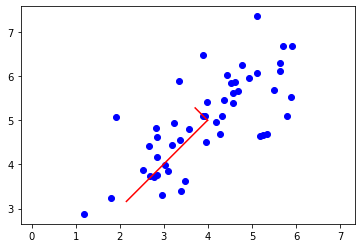

In [13]:
# Run PCA
[U, S] = pca(X_norm);
print('Top eigenvector U[:,1] = \n', U[0,0], U[1,0]);
print('Top eigenvector should be \n -0.707106 -0.707106');
# Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1], c='b');
P1 = mu + 1.5 * S[0] * np.transpose(U[:,0]);
P2 = mu + 1.5 * S[1] * np.transpose(U[:,1]);
plt.plot([mu[0],P1[0]],[mu[1],P1[1]],c ='r');
plt.plot([mu[0],P2[0]],[mu[1],P2[1]], c ='r');
plt.xlim([0.5, 6.5])
plt.ylim([2, 8])
plt.axis('equal');
plt.show

### Dimensionality reduction with PCA
After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space.  In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

#### Projecting the data onto the principal components
Now, you are given a dataset $X$, the principal components $U$, and the desired number of dimensions to reduce to $K$. You should project each example in $X$ onto the top $K$ components in $U$.

In [14]:
def projectData(X, U, K):
    #PROJECTDATA Computes the reduced data representation when projecting only on to the top k eigenvectors
    #   Z = projectData(X, U, K) computes the projection of 
    #   the normalized inputs X into the reduced dimensional space spanned by
    #   the first K columns of U. It returns the projected examples in Z.
    

    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K)) 


    # ====================== YOUR CODE HERE ======================
    
  
    U_reduce = U[:, :K]
    Z = np.dot(X, U_reduce)
    
    # =============================================================
    return Z

In [15]:
# Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
print('Projection of the first example:', Z[0]);
print(' First dimension and you should see a value of about 1.481')

Projection of the first example: [1.49631261]
 First dimension and you should see a value of about 1.481


#### Reconstructing an approximation of the data
After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Now we have to project each example in Z back onto the original space and return the recovered approximation in $X_{rec}$.

In [16]:
def recoverData(Z, U, K):
    #RECOVERDATA Recovers an approximation of the original data when using the 
    #projected data
    #   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
    #   original data that has been reduced to K dimensions. It returns the
    #   approximate reconstruction in X_rec.


    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]));

    # ====================== YOUR CODE HERE ======================
 
    U_reduce = U[:, :K]
    X_rec = np.dot(Z, U_reduce.T)




    # =============================================================
    return X_rec

In [17]:
X_rec  = recoverData(Z, U, K);
print('Approximation of the first example:', X_rec[0, 0], X_rec[0, 1]);
print('You should see a value of about [-1.047 -1.047].')

Approximation of the first example: -1.058052792215478 -1.0580527922154783
You should see a value of about [-1.047 -1.047].


#### Visualizing the projections
After completing both projectData and recoverData, the code in this section will perform both the projection and approximate reconstruction to show how the projection affects the data. The original data points are indicated with the blue points, while the projected data points are indicated with the red points. The projection effectively only retains the information in the direction given by $U_1$.

<function matplotlib.pyplot.show(*args, **kw)>

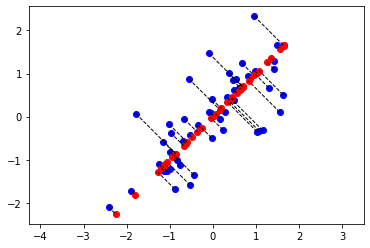

In [18]:
#  Plot the normalized dataset (returned from pca)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c='b');
plt.xlim([-4, 3])
plt.ylim([-4, 3])
plt.axis('equal');
#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], c='r');
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0], X_rec[i,0]],[X_norm[i,1], X_rec[i,1]], 'k--', linewidth=1);
plt.show

### Face image dataset
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset* $X$ of face images, each $32 \times 32$ in grayscale. Each row of $X$ corresponds to one face image (a row vector of length 1024). The code in this section will load and visualize the first 100 of these face images.

(5000, 1024)


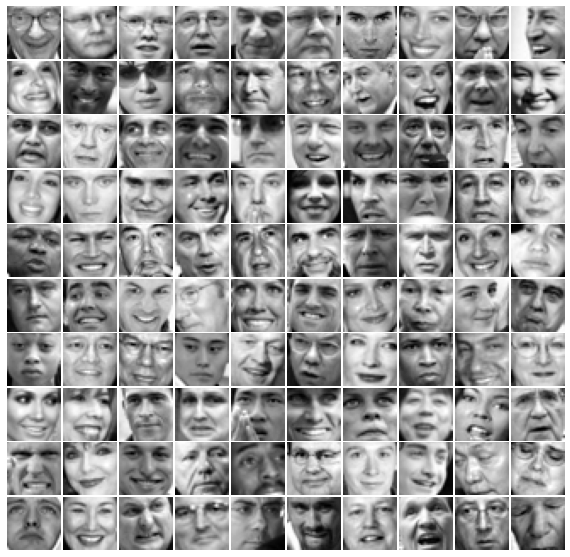

In [19]:
# The following command loads the dataset. You should now have the variable X in your environment
data = loadmat(os.path.join('data', 'ex7faces.mat'))
X = data['X']
print(X.shape);
# Visualize the example dataset
utils.displayData(X[0:100, :])

#### PCA on faces
To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix $X$. The code below will do this for you and then run your PCA code. After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in $U$ (each row) is a vector of length $n$(where for the face dataset, $n=1024$ ). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. 

The code below displays the first 36 principal components that describe the largest variations.  If you want, you can also change the code to display more principal components to see how they capture more and more details. Before running PCA, it is important to first normalize $X$ by subtracting the mean value from each feature.

(5000, 1024)


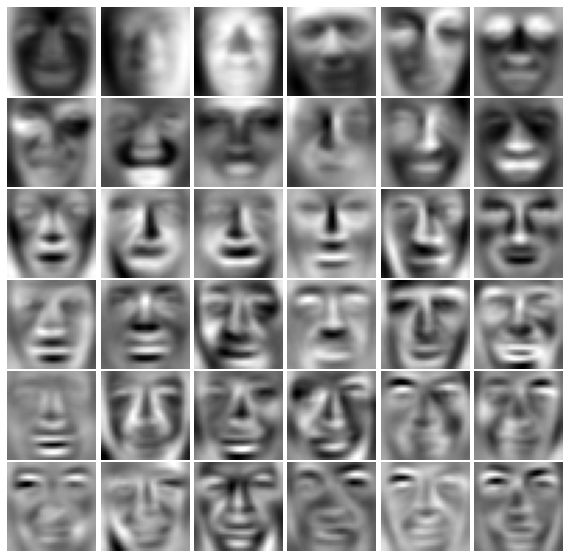

In [20]:
# Normalize X
X_norm, mu = featureNormalize(X);
# Run PCA
[U, S] = pca(X_norm);
print(X_norm.shape);
# Visualize the top 36 eigenvectors found
utils.displayData(np.transpose(U[:, 0:36]));

In [21]:
K = 100;
Z = projectData(X_norm, U, K);

print('The projected data Z has a size of:', Z.shape);

The projected data Z has a size of: (5000, 100)


To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. In the code below, an approximate recovery of the data is performed and the original and projected face images are displayed side by side 

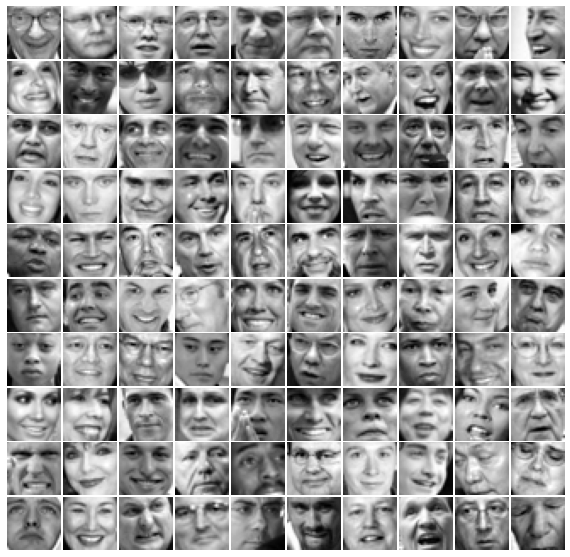

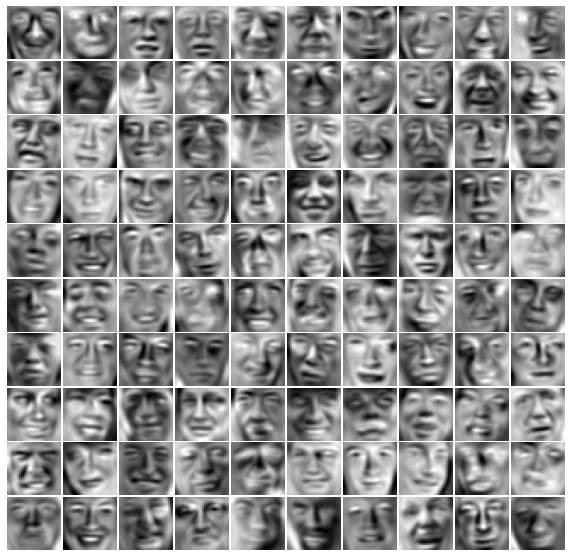

In [22]:
X_rec  = recoverData(Z, U, K);


# Display the original image, rescale back by 255
utils.displayData(X[0:100, :])

# Display compressed image, rescale back by 255
utils.displayData(X_rec[0:100, :])



From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than $10 \times$) in the dataset size that can help speed up your learning algorithm signicantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identitfy of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.